In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpitree.decision_tree import DecisionTreeClassifier

np.random.seed(42)

In [2]:
def test(X, y):
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    print(clf)
    display(clf.export_graphviz())

In [3]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# iris = load_iris(as_frame=True)
# X_train, X_test, y_train, y_test = train_test_split(
#     iris.data[["sepal length (cm)", "sepal width (cm)"]],
#     iris.target,
#     test_size=0.2,
#     random_state=42,
# )

In [4]:
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
# print(clf)
# display(np.column_stack((clf.predict_proba(X_test).round(2), clf.predict(X_test))))
# display(clf.export_graphviz())

In [5]:
X = np.array(
    [
        ["false", "true", "true", "false", "false", "true", "true"],
        ["steep", "moderate", "steep", "steep", "flat", "steep", "steep"],
        ["high", "low", "medium", "medium", "high", "highest", "high"],
    ]
).T

y = np.array(
    [
        "chapparal",
        "riparian",
        "riparian",
        "chapparal",
        "conifer",
        "conifer",
        "chapparal",
    ]
)

X = pd.DataFrame(X, columns=["Stream", "Slope", "Elevation"])
y = pd.Series(y)

┌── Elevation
│  ├── Stream [medium]
│  │  └── class: riparian [true]
│  │  └── class: chapparal [false]
│  ├── Slope [high]
│  │  └── class: chapparal [steep]
│  │  └── class: chapparal [moderate]
│  │  └── class: conifer [flat]
│  └── class: riparian [low]
│  └── class: conifer [highest]


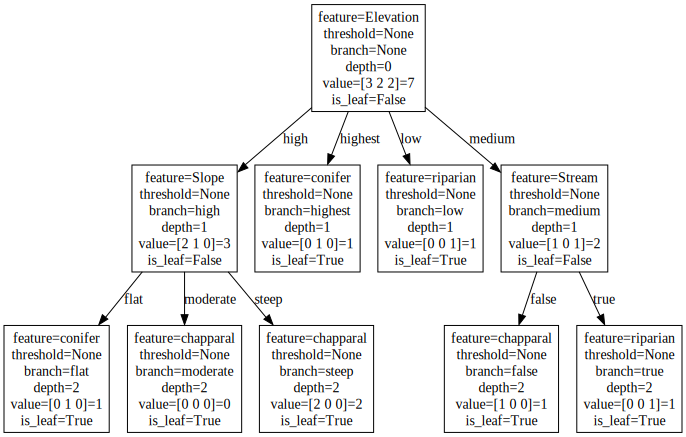

In [6]:
test(X, y)

In [7]:
X = np.array(
    [
        ["false", "true", "true", "false", "false", "true", "true"],
        ["steep", "moderate", "steep", "steep", "flat", "steep", "steep"],
        [3900.0, 300.0, 1500.0, 1200.0, 4450.0, 5000.0, 3000.0],
    ]
).T

y = np.array(
    [
        "chapparal",
        "riparian",
        "riparian",
        "chapparal",
        "conifer",
        "conifer",
        "chapparal",
    ]
)

X = pd.DataFrame(X, columns=["Stream", "Slope", "Elevation"])
y = pd.Series(y)

┌── Elevation
│  ├── Stream [<= 4450.00]
│  │  ├── Elevation [true]
│  │  │  └── class: chapparal [> 3000.00]
│  │  │  └── class: riparian [<= 3000.00]
│  │  └── class: chapparal [false]
│  └── class: conifer [> 4450.00]


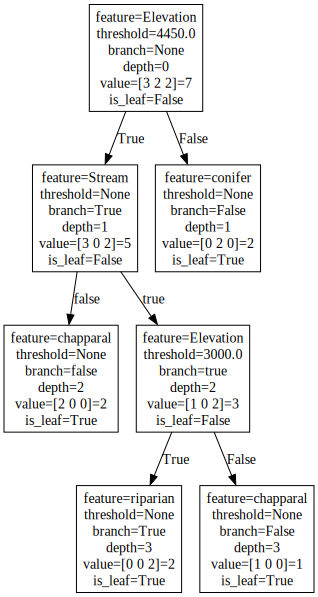

In [8]:
test(X, y)